# Data fitting and regression

1. Scatter plot. Inspection with I/O (plot and look at it first).
2. Relation between the two variables
    * correletaion/anti-correlation
    * uncorrelation
      
    * 2 coeficients
       * Pearson -> r²-> linearity
       * Spearman -> monotonicity

       be careful with the coefficients
3. If we see some relation, we propose a physically motivated model! It always has free parameters (coefficients).
4. Refression is a set of methods to constranint the free parameters in the physics motivated model, so that this represents the data we have. A regression can be done via optimisation, e.g. by minimising a functional.

It is common to overfit the data, this means to add unnecessary free parameters to carry out the regression. This will yield an small error but when doing the extrapolation (extend the model to new data) it will not match it.

The model should have as many free parameters as necessary, no more.

Python has several tools to carry out regressions.

In [1]:
# Import usual libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.optimize as opt

In [12]:
# We use Pandas.DF

df = pd.read_csv("/home/prostofsound/jnotebooks/computational-physics-1/Notes/data/books.dat", sep = "\s+")

print(df)

# Get data into arrays
pages = np.array(df["Pages"]) # in units of pages
thick = np.array(df["Thickness"]) # in units of mm

#print(pages)
#print(thick)

    N  Pages  Thickness
0   1     10        3.0
1   2     20        4.5
2   3     30        5.5
3   4     40        7.0
4   5     50        8.0
5   6     60        9.0
6   7     70        9.5
7   8     80       11.1
8   9     90       12.0
9  10    100       12.9


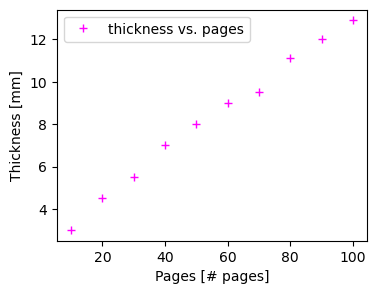

In [13]:
# Figure environment
plt.figure(figsize = (4,3))

plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages") #plot thickness as a function of the number of pages

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()

## Analysing correlation and monotonicity: Coefficients
## Spearman's coefficient
The Spearman correlation evaluates the monotonic relationship between 2 variables.

Linearity is not essential.

A monotonic relationship between 2 variables implies one of two situations:

* (Situation 1) As the value of one variable increases, so does the value of the other variable, OR,

* (Situation 2) As the value of one variable increases, the other variable value decreases.

Not necessarily at a constant rate.

## Pearson 'r' coefficient
The Pearson correlation coefficient (r) is an indicator of how strong a linear correlation between 2 variables is.

It can take values between -1 and 1.

In [14]:
# Let's calculate these coefficients

# 1. Spearman coefficient
sp = st.spearmanr(pages, thick)

# 2. Pearson coefficient
pe = st.pearsonr(pages, thick)

print("Spearman:\n", sp)

print("Pearson:\n", pe) #the pvalues are the leftovers, the probability of the expected distributions just being by chance. These values are on the 
# outskirts of the distribution

Spearman:
 SignificanceResult(statistic=np.float64(0.9999999999999999), pvalue=np.float64(6.646897422032013e-64))
Pearson:
 PearsonRResult(statistic=np.float64(0.9967647822032424), pvalue=np.float64(4.774249416992816e-10))


## Linear regression
We need a physical motivated model when we want to perform a regression. IN THIS CASE, it is reasonable to use a line since we expect the number of pages and the tickness are linearly correlated.

Our model is then:

$thickness = m (pages) + b$

where $b$ is the thickness of the cover. Note that $m$ and $b$ have units of $mm/page$ and $mm$, repectively.

## Method 1: Using np.polyfit()
np.polyfit() returns the coefficients. See the documentation here:

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [17]:
# Get coeffcients - best fit parameters (LM method)

m, b = np.polyfit(pages, thick, 1) #degree of the polynomial is the last input
#polyfit just works for polynomial functionals

# Print to check
print('slope =', m, ' intercept=', b)

slope = 0.10793939393939396  intercept= 2.3133333333333312


In [18]:
# Get fitting function, subtitute the coefficients found on the physical motivated model

fit_thick = m*pages + b

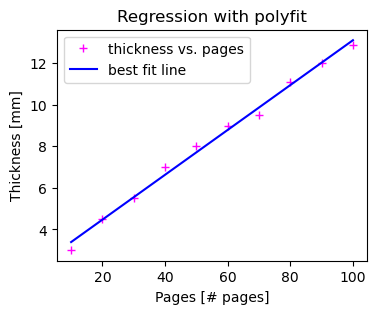

In [19]:
# Replot the data with the fit

# Figure environment
plt.figure(figsize = (4,3))

plt.title("Regression with polyfit")
plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages")

plt.plot(pages, fit_thick, color = "blue",\
        linestyle = "-", label = "best fit line")

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()

## Method 2: Using Scipy functions
The function curve_fit() from the scipy.optimize package can be used.

See documentation here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [20]:
# Define the model function to fit the data

def fit_model(x_values, m, b):
    """
    Function to define model to fut experimental data.
    In this case we use a linear polynomial
    Inputs: x_values (data vector), m -> slope, b -> intercept with Y-axis
    Output: y_values (linear finction)
    """
    y_values = m * x_values + b
    
    return y_values

In [31]:
# Call the curve_fit() function
coef, cova = opt.curve_fit(fit_model, pages, thick) #model, x-data, y-data. We can also add an initial guess for the parameters and
#the uncertainty in the y-data

#Double check
#print(cova) # Covariance matrix
print(coef) # The fitting parameters (optimal)
print(*coef) #print parammeters out of the array
#print(type(cova)) # We got numpy arrays

# Print result:
print('thickness = %.5f * pages + %.5f' % (coef[0], coef[1]))

[0.10793939 2.31333333]
0.107939393939394 2.3133333333333255
thickness = 0.10794 * pages + 2.31333


The covariance matrix is a square matrix that quantifies:
* How much each parameter varies (uncertainty in parameter estimates).
* How changes in one parameter affect another parameter (correlations between parameters).

$$
\mathbf{C}=
\begin{bmatrix}
\text{Var}(p_1) & \text{Cov}(p_1, p_2) & \cdots & \text{Cov}(p_1, p_N) \\
\text{Cov}(p_2, p_1) & \text{Var}(p_2) & \cdots & \text{Cov}(p_2, p_N) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(p_N, p_1) & \text{Cov}(p_N, p_2) & \cdots & \text{Var}(p_N)
\end{bmatrix}
$$

In [28]:
# Define the fitting data
#fit_thick2 = fit_model(pages, coef[0], coef[1])

# Another way to get the fit data
fit_thick2 = fit_model(pages, *coef)

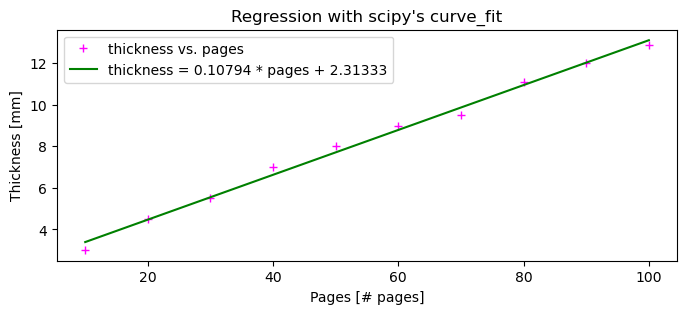

In [29]:
# replot the data with the new fit

# Figure environment
plt.figure(figsize = (8,3))

plt.title("Regression with scipy's curve_fit")

plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages")

plt.plot(pages, fit_thick2, color = "green",\
        linestyle = "-", label = 'thickness = %.5f * pages + %.5f' % (coef[0], coef[1]))

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()
plt.close()

## Uncertainties and level of confidence
From the Gaussian distribution, the pvalues are outside my interval of confidence. 
* Gaussians distributions gives us symmetric uncertainties.
* What about other distributions? $\sigma_1$ and $\sigma_2$ are not symmetric anymore. We need to do some normality test on the data to check this.

Repeat the experiment many more times, central limit theorem to make the uncertainties smaller when averaging all the experiments.

Compute 1$\sigma$ errors on the parameters. We can use:

perr = np.sqrt(np.diag(cov))

In [32]:
print(cova)
print(cova.shape)

[[ 9.46923760e-06 -5.20808071e-04]
 [-5.20808071e-04  3.64565653e-02]]
(2, 2)


In [33]:
# Compute the errors

err= np.sqrt(np.diag(cova))

print("Error in m is %.5f" % (err[0]))
print("Error in b is %.5f" % (err[1]))
print("\n")
# Print result:
print('thickness = (%.5f +/- %.5f) * pages + (%.5f +/- %.5f)' % (coef[0], err[0], coef[1], err[1]))

Error in m is 0.00308
Error in b is 0.19094


thickness = (0.10794 +/- 0.00308) * pages + (2.31333 +/- 0.19094)


## What about using just one parammeter?

In [34]:
# Define the model function to fit the data

def fit_model2(x_values, m):
    """
    Function to define model to fut experimental data.
    In this case we use a linear polynomial
    Inputs: x_values (data vector), m -> slope
    Output: y_values (linear finction)
    """
    y_values = m * x_values
    
    return y_values

In [37]:
# Call the curve_fit() function
coef2, cova2 = opt.curve_fit(fit_model2, pages, thick)

#Double check
print(cova2) # Covariance matrix
print(coef2) # The fitting parameters (optimal)
#print(type(coef2)) # We got numpy arrays

# Print result:
print('thickness = %.5f * pages' % (coef2[0]))

[[3.48989713e-05]]
[0.14098701]
thickness = 0.14099 * pages


In [38]:
# Define the fitting data
#fit_thick3 = fit_model(pages, coef[0])

# Another way to get the fit data
fit_thick3 = fit_model2(pages, *coef2)

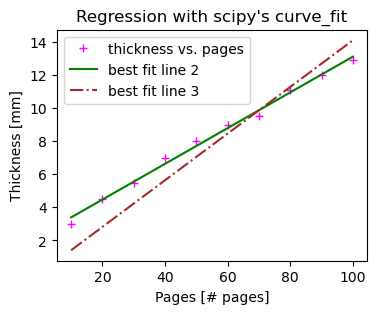

In [41]:
#Replot the data with the new fit

# Figure environment
plt.figure(figsize = (4,3))

plt.title("Regression with scipy's curve_fit")

plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages") #data

plt.plot(pages, fit_thick2, color = "green",\
        linestyle = "-", label = "best fit line 2") #regression using a model with 2 parammeters

plt.plot(pages, fit_thick3, color = "brown",\
        linestyle = "-.", label = "best fit line 3") #regression using a model with one parammeter

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()
plt.close() #clearly, the model with two parammters fits the data the best

## Example 2: Free fall

In [42]:
# Use pandas to open the file and place the data into a DF

df_freefall = pd.read_csv("/home/prostofsound/jnotebooks/computational-physics-1/Notes/data/data_freefall.csv", sep = ",")

print(df_freefall)

    Time (s)  Position (m)
0        0.0           0.0
1        0.5           2.0
2        1.0           5.2
3        1.5           9.8
4        2.0          19.7
5        2.5          31.2
6        3.0          44.4
7        3.5          57.8
8        4.0          80.8
9        4.5         100.4
10       5.0         121.1


In [43]:
# Place the data into numpy arrays

time = np.array(df_freefall["Time (s)"])
ypos = np.array(df_freefall["Position (m)"])

print(ypos, time)

[  0.    2.    5.2   9.8  19.7  31.2  44.4  57.8  80.8 100.4 121.1] [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


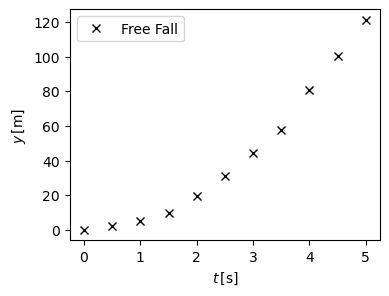

In [44]:
# Fig env:

plt.figure(figsize=(4,3))

plt.plot(time, ypos, color = "black", marker = "x", linestyle = " ", label = "Free Fall") #without linestyle

plt.xlabel(r"$t\,\rm [s]$")
plt.ylabel(r"$y\,\rm [m]$")

plt.legend()

plt.show()

In [48]:
# Let's calculate these coefficients

# 1. Spearman coefficient
sp = st.spearmanr(time, ypos)

# 2. Pearson coefficient
pe = st.pearsonr(time, ypos)

print("Spearman:\n", float(sp[0])**2)

print("Pearson:\n", float(pe[0])**2)

Spearman:
 1.0
Pearson:
 0.9267708692052777


## 1st approach: Scipy regression
We need a physically-motivated mode:

$y = \alpha t²$

where $\alpha = \frac{g}{2}$

In [49]:
# Define our regression model

def fit_mruv(t_values, alpha):
    """
    Parabolic model with 1 free parameter.
    Inputs: t_values are the times, alpha = gravity/2
    Output: y_values
    """
    y_values = alpha*t_values**2
    
    return y_values

In [52]:
# Call the curve_fit function using our model

coef, cova = opt.curve_fit(fit_mruv, time, ypos)

# Print result:
print(coef)
print('y = %.5f * time^2' % (coef[0]))

[4.90275925]
y = 4.90276 * time^2


In [51]:
# Evaluate the time using our regression model and alpha

ypos_fit = fit_mruv(time, *coef)

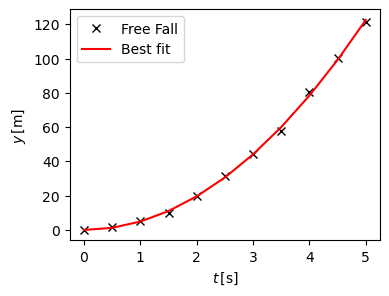

In [53]:
# Fig env:

plt.figure(figsize=(4,3))

plt.plot(time, ypos, color = "black", marker = "x", linestyle = " ", label = "Free Fall")

plt.plot(time, ypos_fit, color = "red", linestyle = "-", label = "Best fit")

plt.xlabel(r"$t\,\rm [s]$")
plt.ylabel(r"$y\,\rm [m]$")

plt.legend()

plt.show()

In [54]:
# Calculate g

grav = coef[0]*2

# Print result:
print('g = %.5f m/s^2' % (grav))

g = 9.80552 m/s^2


In [66]:
# Get the errors
grav_err = np.sqrt(np.diag(cova))[0]*2. #access the element and multiply by two, to get the acceleration of gravity
print(grav_err)

0.06487810050447723


In [67]:
# Print final result:
print('g = (%.5f +/- %.5f) m/s^2' % (grav, grav_err))

g = (9.80552 +/- 0.06488) m/s^2


## Example 3: Radio-Astronomy. Fitting spectral lines
Spectral lines
* Information on composition of gases or material, thanks to quantum mechanics (the transitions inside an atom are discrete).
* Spectroscopy (x-ray, double-slit)
  * Laboratory: Material sciences, nanotechnology
  * Space/Atmosphere: Astronomy, climate, space sciences.

Types of spectral lines
* Emission lines: Gas material gets excited (thermal, increase of collisions, x-ray/UV ionization and with incident photons). We always find noise (base line) on the graph from the spectrograph (Intensity vs wavelength or Intensity vs wavenumber or Intesity vs frequency) and bumps for distinct wavelengths associated with the chemical composition of the gas.
* Absorption lines: There has to be a background source (for example $quasars$ in space). If we have just the source, we have kind of a constant intensity for the different wavelengths. If a gas material is placed in front, the gas is going to absorb specific wavelengths according to the compostion and we see characteristic gaps in the intensity for specific wavelengths.

If two gasses have the same spectral line but with different width, this could indicate different physical processes: higher thermal turbulance. We can understand the internal motion of the gas.

In this exercise we will be fitting Gaussian functions to spectral lines of the $\textbf{H$_1$}$ forbidden transition that occurs as a result of its hyperfine structure.

Let us assume the spin of the p+ is down, then the transition occurs when the spin of the electron flips from up to down (i.e. when going from anti-parallel to parallel). The spin up configuration has a slightly higher energy than the spin down because the magnetic dipole moments are parallel, so when it flips it releases a low-energy photon and goes into the spin down configuration, which has lower energy as the the magnetic dipole moments are anti-parallel. This is related with the quantum numbers s,m. 

We have a hyperfine emission line, at 21 cm in wavelength (radio frequencies) in the neutral hydrogen atom."This transition is highly forbidden with an extremely small transition rate of $2.9 \times 10^{-15} \text{ s}^{-1}$ and a mean lifetime of the excited state of around 10 million years. A spontaneous occurrence of the transition is unlikely to be seen in a laboratory on Earth, but it can be artificially induced using a hydrogen maser. It is commonly observed in astronomical settings such as hydrogen clouds in our galaxy and others. Because of its long lifetime, the line has an extremely small natural width, so most broadening is due to Doppler shifts caused by bulk motion or nonzero temperature of the emitting regions."

The transition.

* At 21 cm, 1.4 GHz.

* The data are taken from the GASS survey (shared via private communication).

* This survey uses the Parkes telescopes in Australia.

If you are interested in more information, I am leaving the links below:

Parkes: https://www.parkes.atnf.csiro.au/

In [69]:
#Cat the file before importing.
#Let's place the data into a pandas DF

h1_df = pd.read_csv("/home/prostofsound/jnotebooks/computational-physics-1/Notes/data/104444.9-264831_gass_spectrum.txt"
                   , sep = "\s+")

print(h1_df)

       velocity        Tb
0   -494.424011 -0.004997
1   -490.500011  0.010002
2   -486.576011  0.017502
3   -482.652011  0.027504
4   -478.728011 -0.014999
..          ...       ...
248  478.727995  0.002502
249  482.651995 -0.012497
250  486.575995  0.007500
251  490.499995 -0.017502
252  494.423995 -0.044998

[253 rows x 2 columns]


Velocity is associated with frequency, it is easier to work with velocities units. Tb is the antenna temperature (how much radiation is received at a particular velocity per surface per frequency).

In [72]:
# Place the data columsn into arrays

h1_vel = np.array(h1_df["velocity"])
h1_int = np.array(h1_df["Tb"])

#print(h1_int)

## Data inspection

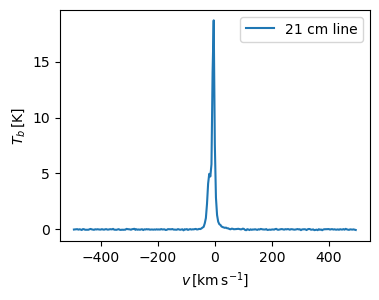

In [73]:
# Plotting: figure environment

plt.figure(figsize=(4,3))

plt.plot(h1_vel, h1_int, label = "21 cm line")

plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.show()

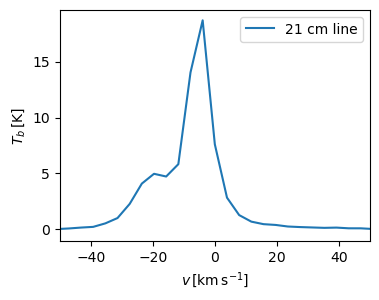

In [74]:
#Zoom in, since the interesting part is around -50 to 50 km/s
# Plotting: figure environment

plt.figure(figsize=(4,3))

plt.plot(h1_vel, h1_int, label = "21 cm line")

plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.xlim(-50, +50)

plt.show()

We have two bumps, at around o (km/s) and -20 (km/s). 0 (km/s) means the gas is static respect to us and -20 (km/s) it is moving towards us. 

Why?

We may be seeing two gasses in the same line of sight of the telescope. There could be internal gas clouds with different velocities. Also, we could be seeing two entities on the same region.

## A: First attempt: Regression model (1 Gaussian - bad model)

In [75]:
# Function for the Gaussian

def one_gaussian(x, a, b, c):
    """
    This defnes a 1-Gaussian model for the regression.
    This may not be the best model because we see 2 components.
    Inputs: x-> velocity vector, a in the height of the Gaussian (the normalization factor),
            b-> is the width, c -> displacement
    Output: y -> 1D 1-Gaussian model
    """
    
    # 1D Gaussian
    y = a*np.exp(-b*(x + c)**2)
    
    return y

In [76]:
# Regression with curve_fit

coef, cova = opt.curve_fit(one_gaussian, h1_vel, h1_int)

print("Best-fit values are:\n", coef)

print("The covariance matrix is:\n", cova) #cova has the sigmas associated with the errors

Best-fit values are:
 [17.28888354  0.02146926  5.34294188]
The covariance matrix is:
 [[1.85376741e-01 3.06952787e-04 1.99827445e-06]
 [3.06952787e-04 1.52459491e-06 9.26003890e-09]
 [1.99827445e-06 9.26003890e-09 1.92585522e-02]]


/tmp/ipykernel_12873/2292147822.py:13: RuntimeWarning: overflow encountered in exp
  y = a*np.exp(-b*(x + c)**2)


In [78]:
# Calculate uncertainties
unc_param = np.sqrt(np.diag(cova))

print("The associated uncertainties are:\n", unc_param)#respectively to a,b,c

The associated uncertainties are:
 [0.43055399 0.00123474 0.13877519]


In [79]:
# Evaluate our model using the best-fit params
h1_int_fit = one_gaussian(h1_vel, *coef)

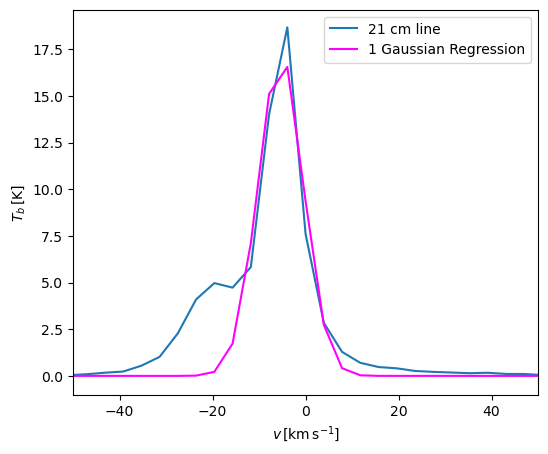

In [80]:
# Figure environment:

plt.figure(figsize=(6,5))

plt.plot(h1_vel, h1_int, label = "21 cm line")

# Regression
plt.plot(h1_vel, h1_int_fit, color = "magenta", label = "1 Gaussian Regression")

plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.xlim(-50, +50)

plt.show()

## B: Second attempt: Regression model (2 Gaussian - good model)

In [95]:
# Function for the Gaussian

def two_gaussian(x, a, b, c, d, e, f):
    """
    This defines a 2-Gaussian model for the regression.
    This may be a good model because we see 2 components.
    Inputs: x-> velocity vector, a,d are the heights of the
            Gaussians,
            b, e-> are the widths,
            c, f -> are the displacements
    Output: y -> 1D 2-Gaussian model
    """
    
    # 2D Gaussians
    y = a*np.exp(-b*(x + c)**2) + d*np.exp(-e*(x + f)**2)
    
    return y

In [96]:
# Regression with curve_fit

coef2, cova2 = opt.curve_fit(two_gaussian, h1_vel, h1_int)

print("Best-fit values are:\n", coef2)

print("The covariance matrix is:\n", cova2)

Best-fit values are:
 [1.50333124e+01 5.59261883e-02 4.76060377e+00 5.34480635e+00
 3.33572924e-03 1.19768036e+01]
The covariance matrix is:
 [[ 1.43335909e-02 -2.35216933e-06  1.77895151e-04 -4.82967383e-03
  -1.56376285e-06  1.04164950e-02]
 [-2.35216933e-06  1.16534762e-06  3.83591977e-06  4.56200753e-05
   6.90247155e-09 -1.02060499e-04]
 [ 1.77895151e-04  3.83591977e-06  6.22394433e-04 -2.67948077e-04
  -5.93357257e-07 -8.21539806e-04]
 [-4.82967383e-03  4.56200753e-05 -2.67948077e-04  5.92455894e-03
   3.09882863e-06 -7.00840075e-03]
 [-1.56376285e-06  6.90247155e-09 -5.93357257e-07  3.09882863e-06
   5.70167640e-09 -1.10258407e-06]
 [ 1.04164950e-02 -1.02060499e-04 -8.21539806e-04 -7.00840075e-03
  -1.10258407e-06  3.33722124e-02]]


/tmp/ipykernel_12873/227499923.py:15: RuntimeWarning: overflow encountered in exp
  y = a*np.exp(-b*(x + c)**2) + d*np.exp(-e*(x + f)**2)


In [97]:
# Calculate uncertainties
unc_param2 = np.sqrt(np.diag(cova2))

print("The associated uncertainties are:\n", unc_param2)

The associated uncertainties are:
 [1.19722976e-01 1.07951268e-03 2.49478342e-02 7.69711565e-02
 7.55094457e-05 1.82680629e-01]


In [98]:
# Evaluate our model using the new best-fit params

h1_int_fit2 = two_gaussian(h1_vel, *coef2)

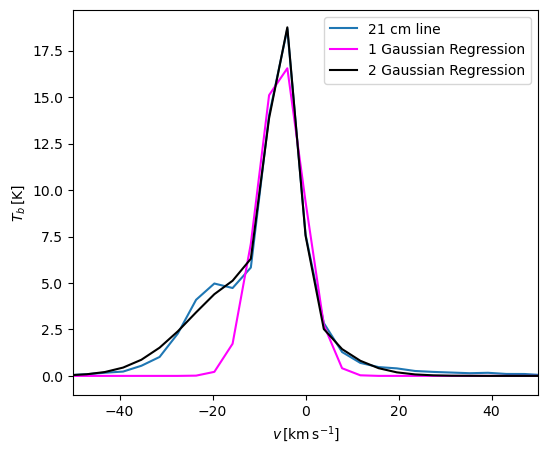

In [99]:
# Figure environment:

plt.figure(figsize=(6,5))

plt.plot(h1_vel, h1_int, label = "21 cm line")

# 1st attemp: Regression -> 1 Gaussian
plt.plot(h1_vel, h1_int_fit, color = "magenta", label = "1 Gaussian Regression")


# 2nd attemp: Regression -> 2 Gaussians
plt.plot(h1_vel, h1_int_fit2, color = "black", label = "2 Gaussian Regression")


plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.xlim(-50, +50)

plt.show()

## Plot separately

In [100]:
# Evaluate each Gaussian

gaussian_1 = one_gaussian(h1_vel, coef2[0], coef2[1], coef2[2])

gaussian_2 = one_gaussian(h1_vel, coef2[3], coef2[4], coef2[5])

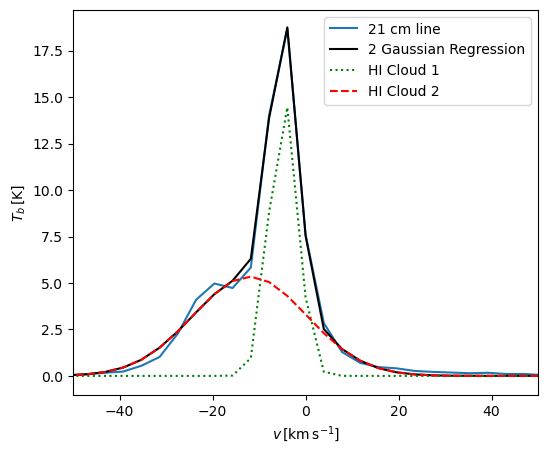

In [101]:
# Figure environment:

plt.figure(figsize=(6,5))

plt.plot(h1_vel, h1_int, label = "21 cm line")

# 1st attemp: Regression -> 1 Gaussian
#plt.plot(h1_vel, h1_int_fit, color = "magenta", label = "1 Gaussian Regression")


# 2nd attemp: Regression -> 2 Gaussians
plt.plot(h1_vel, h1_int_fit2, color = "black", label = "2 Gaussian Regression")

# Gaussian 1
plt.plot(h1_vel, gaussian_1, linestyle = ":", color = "green", label = "HI Cloud 1")

# Gaussian 2
plt.plot(h1_vel, gaussian_2, linestyle = "--", color = "red", label = "HI Cloud 2")

plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.xlim(-50, +50)

plt.show()

The height of the two clouds is related with density. The higher the intensity, higher the density of the gas cloud.
The smaller one is more spread, since it has velocities on different ranges.

In [102]:
print("The central velocity in km/s of the HI cloud 1 is: ", -coef2[2]) #c is the displacement of the frst gaussian

print("The central velocity on km /s of the HI cloud 2 is: ", -coef2[5]) #f is the displacement of the second gaussian

print("The relative velocity between the HI clouds: ", abs(coef2[5]-coef2[2]))

The central velocity in km/s of the HI cloud 1 is:  -4.760603773260288
The central velocity on km /s of the HI cloud 2 is:  -11.976803619035799
The relative velocity between the HI clouds:  7.2161998457755105


## Measuring velocity dispersion:

<div style="text-align: center;">
   $$ b = \frac{1}{2 \sigma_{v}^2} $$

   $$ \sigma_{v} = \sqrt{\frac{1}{2b}} $$
</div>

In [103]:
# CLoud 1 dispersion 

sigma_v1 = np.sqrt(1./(2*coef2[1]))

# CLoud 2 dispersion 

sigma_v2 = np.sqrt(1./(2*coef2[4]))

print("The velocity dispersion in km/s of the HI cloud 1 is: ", sigma_v1)

print("The velocity dispersion in km /s of the HI cloud 2 is: ", sigma_v2)

The velocity dispersion in km/s of the HI cloud 1 is:  2.9900427105924074
The velocity dispersion in km /s of the HI cloud 2 is:  12.24304951775092


The green cloud has a smaller velocity dispersion, not much is happening inside the cloud or to the cloud. The red one has a higher velocity dispersion so the molecules are dispersed and the gas is undergoing something (higher temperature, gravitational pull, etc).

## C: Third attempt: Regression model (3 Gaussian - better model)

In [120]:
# Function for the Gaussian

def three_gaussian(x, a, b, c, d, e, f, g, h, i):
    """
    This defines a 2-Gaussian model for the regression.
    This may be a good model because we see 2 components.
    Inputs: x-> velocity vector, a,d,g are the heights of the
            Gaussians,
            b, e, h -> are the widths,
            c, f, i -> are the displacements
    Output: y -> 1D 2-Gaussian model
    """
    
    # 2D Gaussians
    y = a*np.exp(-b*(x + c)**2) + d*np.exp(-e*(x + f)**2) + g*np.exp(-h*(x + i)**2)
    
    return y

In [121]:
# Regression with curve_fit

coef3, cova3 = opt.curve_fit(three_gaussian, h1_vel, h1_int)

print("Best-fit values are:\n", coef3)

print("The covariance matrix is:\n", cova3)

Best-fit values are:
 [5.51133686e+00 3.65487754e-03 1.23774801e+01 1.40312827e+01
 9.83166843e-02 5.53107717e+00 4.50619096e+00 5.40855516e-02
 1.82182243e+00]
The covariance matrix is:
 [[ 8.63369447e-03  2.24000137e-07 -1.86128896e-02  8.91160187e-01
  -1.36385928e-03 -4.50261735e-02 -4.90728817e-01  6.53011777e-03
  -5.04627298e-01]
 [ 2.24000137e-07  1.03520509e-08  1.49146347e-05 -1.36467639e-03
   3.62288223e-06  7.89150115e-05  8.13469587e-04 -9.93680994e-06
   7.96151054e-04]
 [-1.86128896e-02  1.49146347e-05  8.45495119e-02 -4.63488515e+00
   1.00720937e-02  2.53657410e-01  2.67474926e+00 -3.38705193e-02
   2.67050399e+00]
 [ 8.91160187e-01 -1.36467639e-03 -4.63488515e+00  5.51998634e+02
  -1.35650791e+00 -3.13687666e+01 -3.24309149e+02  3.96324204e+00
  -3.21009350e+02]
 [-1.36385928e-03  3.62288223e-06  1.00720937e-02 -1.35650791e+00
   3.52793566e-03  7.85047626e-02  8.05589858e-01 -9.72855477e-03
   7.92347547e-01]
 [-4.50261735e-02  7.89150115e-05  2.53657410e-01 -3.1368

/tmp/ipykernel_12873/3713614273.py:15: RuntimeWarning: overflow encountered in exp
  y = a*np.exp(-b*(x + c)**2) + d*np.exp(-e*(x + f)**2) + g*np.exp(-h*(x + i)**2)
/tmp/ipykernel_12873/3713614273.py:15: RuntimeWarning: overflow encountered in add
  y = a*np.exp(-b*(x + c)**2) + d*np.exp(-e*(x + f)**2) + g*np.exp(-h*(x + i)**2)


In [122]:
# Calculate uncertainties
unc_param3 = np.sqrt(np.diag(cova3))

print("The associated uncertainties are:\n", unc_param3)

The associated uncertainties are:
 [9.29176758e-02 1.01745029e-04 2.90773988e-01 2.34946512e+01
 5.93964280e-02 1.33924585e+00 1.38181866e+01 1.68752951e-01
 1.36655623e+01]


In [123]:
# Evaluate our model using the best-fit params

h1_int_fit3 = three_gaussian(h1_vel, *coef3)

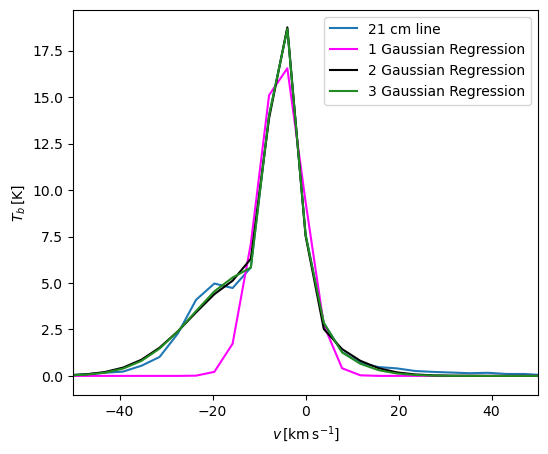

In [124]:
# Figure environment:

plt.figure(figsize=(6,5))

plt.plot(h1_vel, h1_int, label = "21 cm line")

# 1st attemp: Regression -> 1 Gaussian
plt.plot(h1_vel, h1_int_fit, color = "magenta", label = "1 Gaussian Regression")


# 2nd attemp: Regression -> 2 Gaussians
plt.plot(h1_vel, h1_int_fit2, color = "black", label = "2 Gaussian Regression")

# 3rd attemp: Regression -> 3 Gaussians
plt.plot(h1_vel, h1_int_fit3, color = "forestgreen", label = "3 Gaussian Regression")


plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.xlim(-50, +50)

plt.show()

In [125]:
# Evaluate each Gaussian

gaussian_1 = one_gaussian(h1_vel, coef3[0], coef3[1], coef3[2])

gaussian_2 = one_gaussian(h1_vel, coef3[3], coef3[4], coef3[5])

gaussian_3 = one_gaussian(h1_vel, coef3[6], coef3[7], coef3[8])

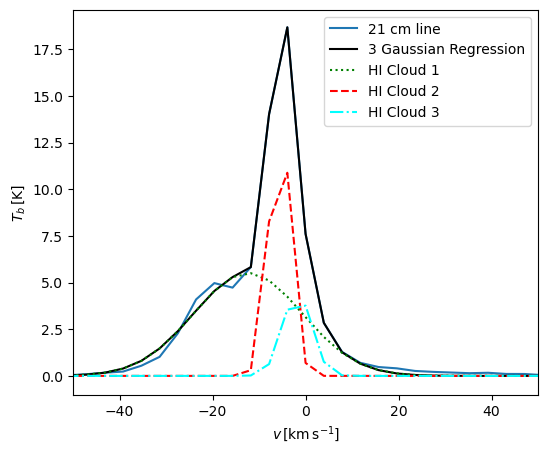

In [126]:
# Figure environment:

plt.figure(figsize=(6,5))

plt.plot(h1_vel, h1_int, label = "21 cm line")

# 1st attemp: Regression -> 1 Gaussian
#plt.plot(h1_vel, h1_int_fit, color = "magenta", label = "1 Gaussian Regression")


# 2nd attemp: Regression -> 2 Gaussians
plt.plot(h1_vel, h1_int_fit3, color = "black", label = "3 Gaussian Regression")

# Gaussian 1
plt.plot(h1_vel, gaussian_1, linestyle = ":", color = "green", label = "HI Cloud 1")

# Gaussian 2
plt.plot(h1_vel, gaussian_2, linestyle = "--", color = "red", label = "HI Cloud 2")

# Gaussian 3
plt.plot(h1_vel, gaussian_3, linestyle = "-.", color = "cyan", label = "HI Cloud 3")

plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.xlim(-50, +50)

plt.show()

Both, polyfit() from numpy and curve_fit() from scipy optimize, use least squares methods to fit functions, but they are used for different types of models. The key differences are:
* polyfit() fits only polynomials and uses a direct linear least squares solution.
*curve_fit() can fit any function (including polynomials, exponentials, Gaussians, etc.) and uses nonlinear least squares optimization, which can handle more complex models but might require good initial parameter guesses.

The LSM method does not consider the dispersion of the data itself. We have to use a better functional.